# Installing necessary libraries


Import necessary Python libraries required for data handling, machine learning model building, computation and creating visuals.

In [113]:
#pip install textblob
#pip install wordcloud

In [114]:
import json
import numpy as np
import pandas as pd
from collections import Counter
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from xgboost import XGBClassifier



# Download NLTK resources
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to /Users/billpark/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/billpark/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/billpark/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/billpark/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

# Data preparation
* loading data from JSON files and cleaning text data. These functions help modularize the code for better readability and reuse.

In [115]:
# Function to load JSON data into a DataFrame
def load_json_to_df(json_file):
    with open(json_file, 'r') as file:
        data = json.load(file)
    return pd.DataFrame.from_dict(data, orient='index')

# List of JSON files
json_files = ['HR.json', 'HF.json', 'MR.json', 'MF.json', 'PHF.json', 'PHR.json', 'PMF.json', 'PMR.json']
dfs = []

# Load each JSON file into a DataFrame and store them in a list
for json_file in json_files:
    df_path = f'data/{json_file}'  # Corrected file path string formation
    df = load_json_to_df(df_path)
    dfs.append(df)

# Naming the DataFrames, ensure you have all 8 DataFrames named if using them distinctly
HR_df, HF_df, MR_df, MF_df, PHF_df, PHR_df, PMF_df, PMR_df = dfs


In [116]:
HR = HR_df['text']
HF = HF_df['text']
MR = MR_df['text']
MF = MF_df['text']

# Extracting 'text' columns for PolitiFact datasets
PHR = PHR_df['text']
PHF = PHF_df['text']
PMR = PMR_df['text']
PMF = PMF_df['text']

In [117]:
df = pd.concat([HR, HF, MR, MF], ignore_index=True)

# Most Common words

-One of the feedbacks that we recieved from the practicum presentation last week was to see what are the trends and possible 

-In this section we explored the differences in the most common words between groups.

We noticed a lot of overlap between the two human-authored groups and much less overlap when compared to the AI text.

In [118]:
# Assuming you've already defined load_json_to_df

# Function to load and tokenize the text from a DataFrame
def load_and_tokenize_text(json_file):
    df = load_json_to_df(json_file)
    # Tokenize each item in the 'text' column
    df['tokens'] = df['preprocessed_text'].apply(word_tokenize)
    return df

# List of JSON files
json_files = ['HR_prep.json', 'HF_prep.json', 'MR_prep.json', 'MF_prep.json']
category_data = []

# Load and tokenize each JSON file into a DataFrame and store them in a list
for json_file in json_files:
    df = load_and_tokenize_text('data/' + json_file)
    category_data.append(df)

# Extract tokenized words for each category
tokens_hr = [token for sublist in category_data[0]['tokens'] for token in sublist]
tokens_hf = [token for sublist in category_data[1]['tokens'] for token in sublist]
tokens_mr = [token for sublist in category_data[2]['tokens'] for token in sublist]
tokens_mf = [token for sublist in category_data[3]['tokens'] for token in sublist]

# Count and display the top 30 most common words for each category, excluding the top 5 and lowest 5
def display_common_words(tokens, category_name):
    counter = Counter(tokens)
    most_common = counter.most_common(30)  # Get the top 30 common words sorted by frequency

    # Exclude the top 5 and the lowest 5 common words
    middle_words = most_common[5:-5]

    print(f"Top 20 common words in {category_name} (excluding top 5 and lowest 5):")
    for word, freq in middle_words:
        print(f"{word}: {freq}")
    print("\n")

# Example usage
display_common_words(tokens_hr, "Human Real")
display_common_words(tokens_hf, "Human Fake")
display_common_words(tokens_mr, "Machine Real")
display_common_words(tokens_mf, "Machine Fake")




Top 20 common words in Human Real (excluding top 5 and lowest 5):
year: 5116
new: 4893
also: 4541
first: 4058
people: 3949
season: 3882
say: 3525
get: 3513
im: 3389
love: 3279
star: 3242
day: 3201
know: 3074
two: 3019
life: 3011
would: 3003
back: 2896
thing: 2811
really: 2791
family: 2781


Top 20 common words in Human Fake (excluding top 5 and lowest 5):
one: 4702
new: 4164
also: 3530
love: 3499
say: 3495
told: 3366
family: 3184
life: 3184
people: 3151
would: 3149
get: 3088
together: 3052
show: 2988
first: 2960
two: 2957
star: 2920
relationship: 2920
want: 2877
know: 2875
shes: 2836


Top 20 common words in Machine Real (excluding top 5 and lowest 5):
year: 3377
new: 3178
like: 2654
season: 2605
life: 2600
love: 2533
family: 2347
first: 2272
however: 2110
star: 2065
relationship: 1958
couple: 1953
shared: 1911
made: 1856
day: 1831
woman: 1692
expressed: 1662
people: 1659
two: 1640
even: 1620


Top 20 common words in Machine Fake (excluding top 5 and lowest 5):
relationship: 2745
said:

# Word Cloud

Word clouds offer a visually intuitive way for readers to grasp the frequency and prominence of words within a text. By representing words in varying sizes based on their occurrence, word clouds provide a quick glimpse into the most commonly used terms or themes. 

This visual simplicity enables readers to swiftly discern which words are most prevalent, thereby gaining a rapid understanding of the key topics or concepts within the text.

## Functions for wordcloud creation

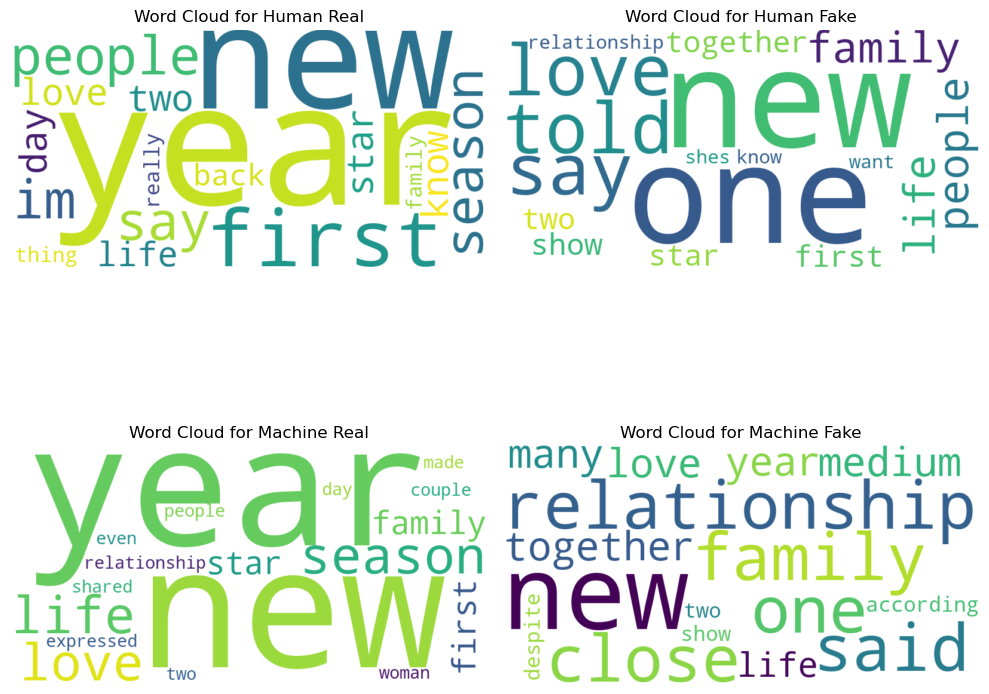

In [119]:

def generate_and_display_word_cloud(tokens, category_name, subplot_index):
    # Count the frequency of each token
    counter = Counter(tokens)
    
    # Exclude top 5 and lowest 5 most common words
    if len(counter) > 10:
        common_tokens = [word for word, _ in counter.most_common(30)[5:-5]]
    else:
        common_tokens = tokens
    
    # Join the tokens into a single string
    text = ' '.join(common_tokens)

    # Create a word cloud object
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

    # Display the word cloud
    plt.subplot(subplot_index)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f"Word Cloud for {category_name}")

# Create a figure with subplots
plt.figure(figsize=(10, 10))

# Generate and display word clouds for each category
generate_and_display_word_cloud(tokens_hr, "Human Real", 221)
generate_and_display_word_cloud(tokens_hf, "Human Fake", 222)
generate_and_display_word_cloud(tokens_mr, "Machine Real", 223)
generate_and_display_word_cloud(tokens_mf, "Machine Fake", 224)

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()


# Data labeling and preparation

**Text Concatenation and Cleaning:**

* Purpose: Combine texts from two distinct categories (e.g., Human Real and Machine Fake) into a single dataset. This facilitates a comprehensive comparison during model training.
* Process: Standardize formatting and remove extraneous content to ensure uniformity across the dataset. This may involve stripping unnecessary HTML tags, correcting typographical errors, and standardizing the use of language to improve model readability and performance.

This process was done before and we use text data generated from it.
 
## Labeling:

* Procedure: Assign binary labels to each text instance, categorizing them as either human-generated (0) or AI-generated (1). This labeling is crucial for supervised learning, where the model is trained to predict the category of new, unseen texts.
* Significance: Accurate labeling is critical for training, as it directly influences the model's learning and its subsequent predictive accuracy.


In [120]:
from sklearn.metrics import accuracy_score, classification_report

# Assigning labels for each comparison
labels_hr_vs_mf = [0] * len(HR) + [1] * len(MF)
labels_hf_vs_mf = [0] * len(HF) + [1] * len(MF)
labels_mr_vs_mf = [0] * len(MR) + [1] * len(MF)
labels_hf_vs_mr = [0] * len(HF) + [1] * len(MR)
labels_hr_vs_mr = [0] * len(HR) + [1] * len(MR)
labels_hr_vs_hf = [0] * len(HR) + [1] * len(HF)

#Separate for Human vs AI in general
labels_hr_hf = [0] * (len(HR) + len(HF))
labels_mr_mf = [1] * (len(MR) + len(MF))

labels_human_machine = labels_hr_hf + labels_mr_mf


## Splitting Data:

* Objective: Divide the dataset into training and testing subsets to validate the model’s effectiveness on data it has not encountered during the training phase.
* Details: Typically, the data is split into an 80/20 ratio, where 80% is used for training the model, and the remaining 20% serves as the test set.

In [121]:
# Splitting the data for each comparison
X_train_hr_vs_mf, X_test_hr_vs_mf, y_train_hr_vs_mf, y_test_hr_vs_mf = train_test_split(pd.concat([HR, MF], ignore_index=True), labels_hr_vs_mf, test_size=0.2, random_state=42)
X_train_hf_vs_mf, X_test_hf_vs_mf, y_train_hf_vs_mf, y_test_hf_vs_mf = train_test_split(pd.concat([HF, MF], ignore_index=True), labels_hf_vs_mf, test_size=0.2, random_state=42)
X_train_mr_vs_mf, X_test_mr_vs_mf, y_train_mr_vs_mf, y_test_mr_vs_mf = train_test_split(pd.concat([MR, MF], ignore_index=True), labels_mr_vs_mf, test_size=0.2, random_state=42)
X_train_hf_vs_mr, X_test_hf_vs_mr, y_train_hf_vs_mr, y_test_hf_vs_mr = train_test_split(pd.concat([HF, MR], ignore_index=True), labels_hf_vs_mr, test_size=0.2, random_state=42)
X_train_hr_vs_mr, X_test_hr_vs_mr, y_train_hr_vs_mr, y_test_hr_vs_mr = train_test_split(pd.concat([HR, MR], ignore_index=True), labels_hr_vs_mr, test_size=0.2, random_state=42)
X_train_hr_vs_hf, X_test_hr_vs_hf, y_train_hr_vs_hf, y_test_hr_vs_hf = train_test_split(pd.concat([HR, HF], ignore_index=True), labels_hr_vs_hf, test_size=0.2, random_state=42)

# Splitting the data for the comparison between human-generated and machine-generated text
X_train_human_machine, X_test_human_machine, y_train_human_machine, y_test_human_machine = train_test_split(pd.concat([pd.concat([HR, HF]), pd.concat([MR, MF])], ignore_index=True),labels_human_machine,test_size=0.2,random_state=42)


## Vectorization:

* Technique: Implement TF-IDF vectorization to convert text into a numerical format. This step transforms the raw text into a feature set that quantifies the importance of words relative to their frequency in the document and across the corpus.
* Rationale: This method helps in emphasizing words that are unique to particular documents, enhancing the model’s ability to distinguish between different types of text based on their content.


In [122]:

# Creating TF-IDF vectorizer for each comparison
tfidf_vectorizer_hr_vs_mf = TfidfVectorizer(max_features=5000)
X_train_hr_vs_mf_tfidf = tfidf_vectorizer_hr_vs_mf.fit_transform(X_train_hr_vs_mf)
X_test_hr_vs_mf_tfidf = tfidf_vectorizer_hr_vs_mf.transform(X_test_hr_vs_mf)

tfidf_vectorizer_hf_vs_mf = TfidfVectorizer(max_features=5000)
X_train_hf_vs_mf_tfidf = tfidf_vectorizer_hf_vs_mf.fit_transform(X_train_hf_vs_mf)
X_test_hf_vs_mf_tfidf = tfidf_vectorizer_hf_vs_mf.transform(X_test_hf_vs_mf)

tfidf_vectorizer_mr_vs_mf = TfidfVectorizer(max_features=5000)
X_train_mr_vs_mf_tfidf = tfidf_vectorizer_mr_vs_mf.fit_transform(X_train_mr_vs_mf)
X_test_mr_vs_mf_tfidf = tfidf_vectorizer_mr_vs_mf.transform(X_test_mr_vs_mf)

tfidf_vectorizer_hf_vs_mr = TfidfVectorizer(max_features=5000)
X_train_hf_vs_mr_tfidf = tfidf_vectorizer_hf_vs_mr.fit_transform(X_train_hf_vs_mr)
X_test_hf_vs_mr_tfidf = tfidf_vectorizer_hf_vs_mr.transform(X_test_hf_vs_mr)

tfidf_vectorizer_hr_vs_mr = TfidfVectorizer(max_features=5000)
X_train_hr_vs_mr_tfidf = tfidf_vectorizer_hr_vs_mr.fit_transform(X_train_hr_vs_mr)
X_test_hr_vs_mr_tfidf = tfidf_vectorizer_hr_vs_mr.transform(X_test_hr_vs_mr)

tfidf_vectorizer_hr_vs_hf = TfidfVectorizer(max_features=5000)
X_train_hr_vs_hf_tfidf = tfidf_vectorizer_hr_vs_hf.fit_transform(X_train_hr_vs_hf)
X_test_hr_vs_hf_tfidf = tfidf_vectorizer_hr_vs_hf.transform(X_test_hr_vs_hf)

# human and machine in general

# Create TF-IDF vectorizer for human vs. machine comparison
tfidf_vectorizer_human_machine = TfidfVectorizer()
X_train_human_machine_tfidf = tfidf_vectorizer_human_machine.fit_transform(X_train_human_machine)
X_test_human_machine_tfidf = tfidf_vectorizer_human_machine.transform(X_test_human_machine)


### Building the XGBoost Model for Text Classification
XGBoost stands for Extreme Gradient Boosting, a powerful machine learning technique that has gained popularity due to its performance in numerous machine learning competitions. Unlike traditional algorithms, XGBoost handles various types of structured data. It's particularly effective in classification tasks, including text classification, where it can discern intricate patterns in data.

#### Methods:

* The **"train_and_evaluate_xgboost"** function encapsulates the training and evaluation process of the XGBoost model. The model utilizes a series of decision trees that are trained in a gradient boosting framework.
* During training, features are extracted from text data, which has been previously transformed into a numerical format using techniques like TF-IDF vectorization. These features may include word frequencies or other text statistics that are significant for classification.
XGBoost optimizes both the computational efficiency and model performance by employing a level-wise growth strategy for the trees and incorporating regularized learning to prevent overfitting.
* In the evaluation phase, the model's accuracy in categorizing text as either human or machine-generated is assessed using a separate test dataset.


#### Rationale/Assumptions:

* We assume that texts generated by machines exhibit certain identifiable patterns that differ from those in human writing. These differences could be in the usage frequency of certain words, phrases, or grammatical structures.
* By applying XGBoost to a labeled dataset comprising both human and machine-generated texts, the model is trained to identify and leverage these unique features, improving its predictive accuracy.

#### Limitations/Caveats:

* While XGBoost is effective for a range of classification problems, its performance heavily relies on the quality of feature engineering and the representativeness of the training data. Inadequate or biased data can lead to poor generalization to new, unseen texts.
* XGBoost, being a gradient boosting model, might also be less intuitive to tune compared to more straightforward models, as it involves setting numerous hyperparameters like learning rate, depth of trees, and number of trees.
* Unlike deep learning models, XGBoost does not inherently process sequential data, which can be a limitation for complex linguistic tasks requiring understanding of long-term dependencies.

In [123]:
# Function to train and evaluate the XGBoost model
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report

def train_and_evaluate_xgboost(X_train, X_test, y_train, y_test, max_depth=6, n_estimators=100):
    try:
        # Model initialization with additional parameters
        model = XGBClassifier(
            use_label_encoder=False, 
            eval_metric=['logloss', 'error'],
            max_depth=max_depth,
            n_estimators=n_estimators
        )
        
        # Define evaluation set
        eval_set = [(X_train, y_train), (X_test, y_test)]

        # Model training with evaluation history
        model.fit(X_train, y_train, eval_set=eval_set, verbose=False, early_stopping_rounds=10)

        # Model evaluation
        y_pred = model.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        report = classification_report(y_test, y_pred)
        
        # Retrieve performance metrics
        history = model.evals_result()
        training_accuracy = [1 - x for x in history["validation_0"]["error"]]
        validation_accuracy = [1 - x for x in history["validation_1"]["error"]]
        
        history["accuracy"] = training_accuracy
        history["val_accuracy"] = validation_accuracy

        return model, accuracy, report, history
    except Exception as e:
        print(f"An error occurred: {e}")
        return None, None, None, None



# Example: Training and evaluating the XGBoost model for HR vs. MF comparison
model_hr_vs_mf, accuracy_hr_vs_mf, report_hr_vs_mf, history_hr_vs_mf = train_and_evaluate_xgboost(
    X_train_hf_vs_mf_tfidf, 
    X_test_hf_vs_mf_tfidf, 
    y_train_hf_vs_mf, 
    y_test_hf_vs_mf
)

# Training and evaluating the XGBoost model for HF vs MF comparison

model_hf_vs_mf, accuracy_hf_vs_mf, _, history_hf_vs_mf = train_and_evaluate_xgboost(
    X_train_hf_vs_mf_tfidf, 
    X_test_hf_vs_mf_tfidf, 
    y_train_hf_vs_mf, 
    y_test_hf_vs_mf
)


# Training and evaluating the model for MR vs MF comparison
model_mr_vs_mf, accuracy_mr_vs_mf, _, history_mr_vs_mf = train_and_evaluate_xgboost(
    X_train_mr_vs_mf_tfidf,
    X_test_mr_vs_mf_tfidf,
    y_train_mr_vs_mf,
    y_test_mr_vs_mf
)

# Training and evaluating the model for HF vs MR comparison
model_hf_vs_mr, accuracy_hf_vs_mr, _, history_hf_vs_mr = train_and_evaluate_xgboost(
    X_train_hf_vs_mr_tfidf,
    X_test_hf_vs_mr_tfidf,
    y_train_hf_vs_mr,
    y_test_hf_vs_mr
)

# Training and evaluating the model for HR vs MR comparison
model_hr_vs_mr, accuracy_hr_vs_mr, _, history_hr_vs_mr = train_and_evaluate_xgboost(
    X_train_hr_vs_mr_tfidf,
    X_test_hr_vs_mr_tfidf,
    y_train_hr_vs_mr,
    y_test_hr_vs_mr
)


# Training and evaluating the model for HR vs HF comparison
model_hr_vs_hf, accuracy_hr_vs_hf, _, history_hr_vs_hf = train_and_evaluate_xgboost(
    X_train_hr_vs_hf_tfidf,
    X_test_hr_vs_hf_tfidf,
    y_train_hr_vs_hf,
    y_test_hr_vs_hf
)

# Train and evaluate the XGBoost model for human vs. machine comparison
model_human_machine, accuracy_human_machine, report_human_machine, history_human_machine = train_and_evaluate_xgboost(
    X_train_human_machine_tfidf, 
    X_test_human_machine_tfidf, 
    y_train_human_machine, 
    y_test_human_machine
)

/opt/anaconda3/lib/python3.11/site-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in c

# Results and Visuals

#### Visualization of Model Training and Validation Metrics
  1. **Accuracy Plot**: Show both training and validation accuracy over epochs. Training accuracy indicates how well the model is learning the dataset, while validation accuracy shows how well the model generalizes to new data.
  2. **Loss Plot**: Display training and validation loss over epochs. Training loss measures how well the model fits the data, whereas validation loss measures model performance on the unseen data.
- **Rationale**:
  - **Accuracy and Loss Trends**:
    - **Consistent Increase in Validation Accuracy** and **Decrease in Validation Loss** suggest good model generalization.
    - **Large Gaps between Training and Validation Metrics** may indicate **overfitting**, where the model learns the training data too well, including the noise and errors, at the expense of its ability to generalize.
    - **High Validation Loss** or **Plateaus in Validation Accuracy** can signal **underfitting**, where the model does not perform well even on training data, suggesting it is too simple.
- **Outputs**:
  - A combined plot with training and validation accuracy and loss, providing a visual representation of the model's learning curve and its ability to generalize across epochs.

In [124]:
import matplotlib.pyplot as plt

def plot_history(history, comparison_name):
    plt.figure(figsize=(12, 6))
    plt.suptitle(f'Model Training and Validation Metrics for {comparison_name}')
    
    plt.subplot(1, 2, 1)
    train_accuracy = history['accuracy']
    val_accuracy = history['val_accuracy']
    epochs = range(1, len(train_accuracy) + 1)
    plt.plot(epochs, train_accuracy, label='Training Accuracy')
    plt.plot(epochs, val_accuracy, label='Validation Accuracy')
    plt.title('Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history['validation_0']['logloss'], label='Training Log Loss')
    plt.plot(history['validation_1']['logloss'], label='Validation Log Loss')
    plt.title('Log Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Log Loss')
    plt.legend()

    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()


Accuracy HF vs MF: 0.9651162790697675


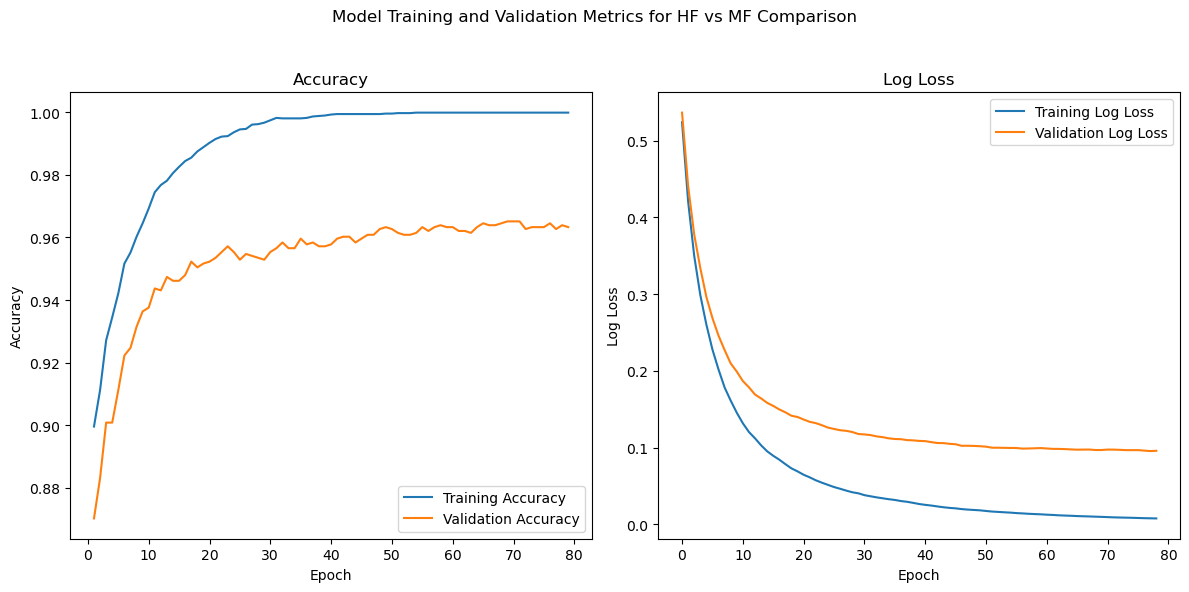

In [125]:
# Call plot_history function with the appropriate history data
print(f"Accuracy HF vs MF: {accuracy_hf_vs_mf}")
plot_history(history_hf_vs_mf, 'HF vs MF Comparison')

Accuracy HR vs MF: 0.9651162790697675


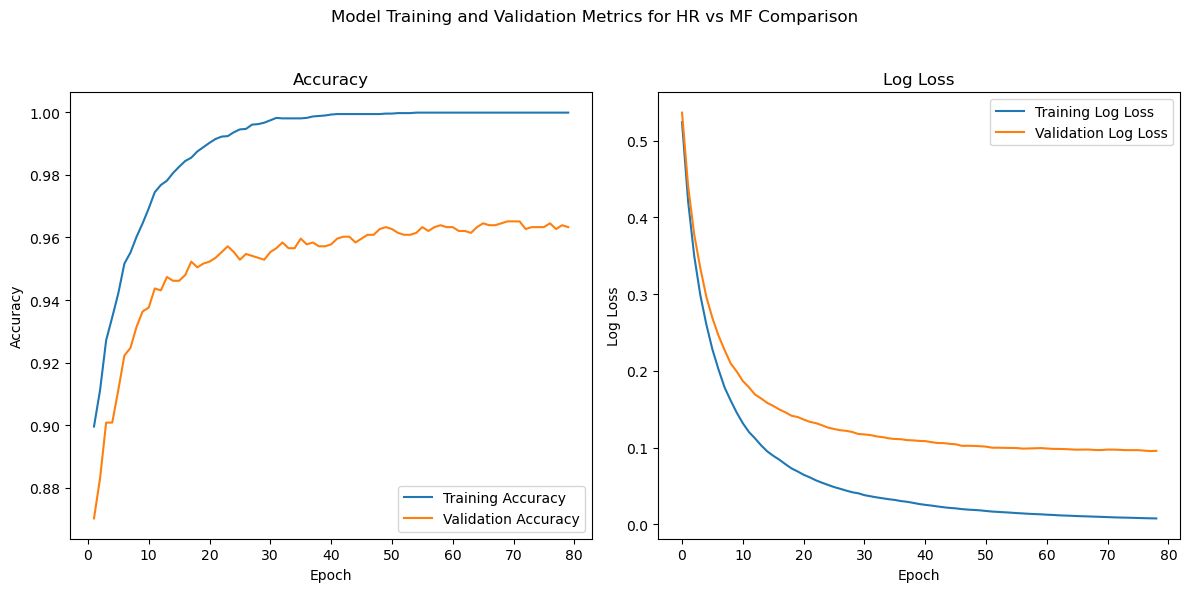

In [126]:
print(f"Accuracy HR vs MF: {accuracy_hr_vs_mf}")
plot_history(history_hr_vs_mf, 'HR vs MF Comparison')

Accuracy HF vs MR: 0.9158086008479709


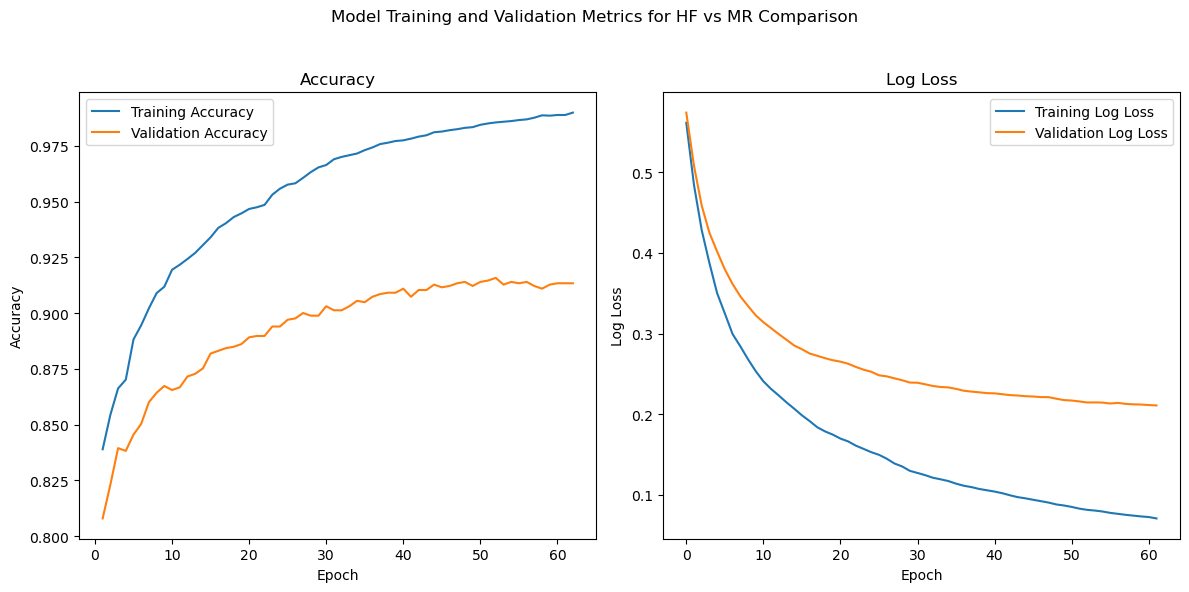

In [127]:
print(f"Accuracy HF vs MR: {accuracy_hf_vs_mr}")
plot_history(history_hf_vs_mr, 'HF vs MR Comparison')

Accuracy HR vs MR: 0.8804804804804804


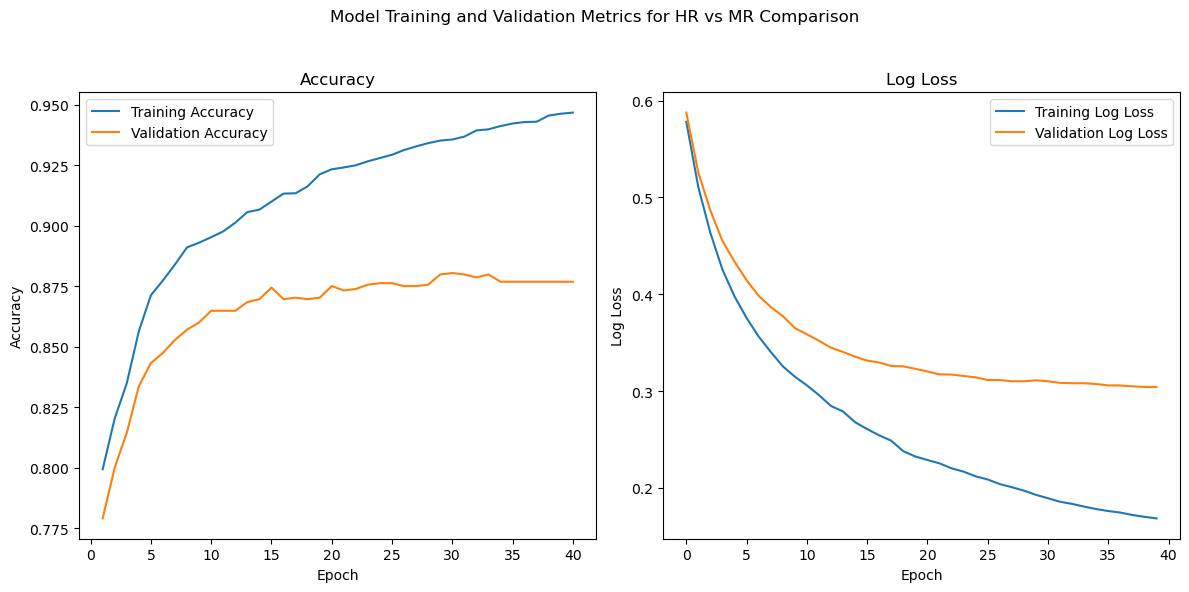

In [128]:
print(f"Accuracy HR vs MR: {accuracy_hr_vs_mr}")
plot_history(history_hr_vs_mr, 'HR vs MR Comparison')

Accuracy HR vs HF: 0.7839805825242718


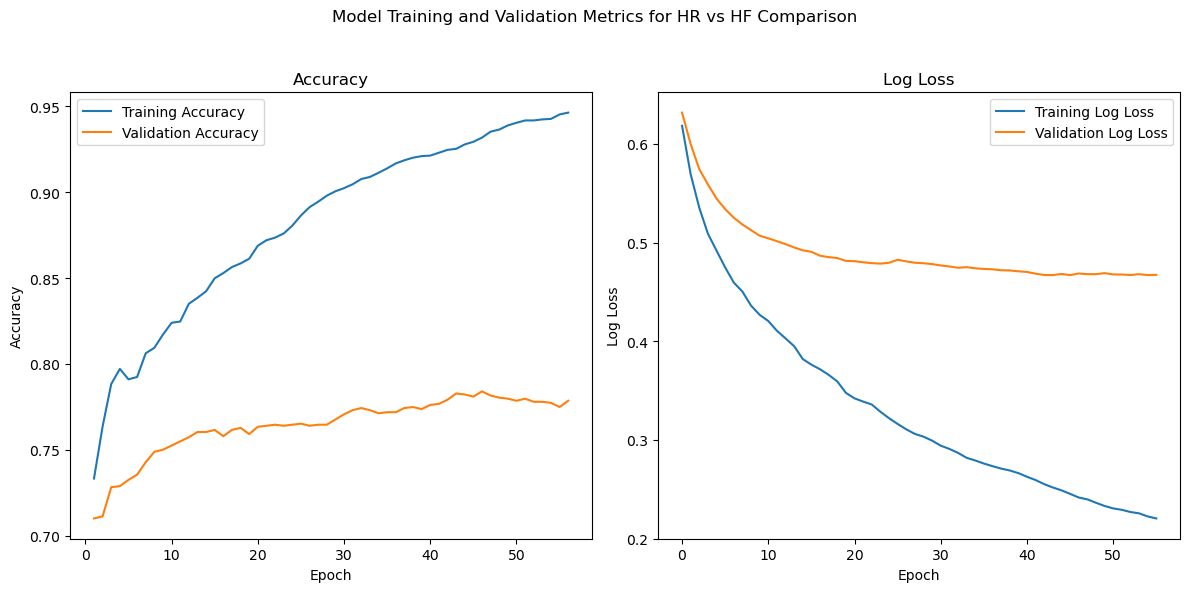

In [129]:
print(f"Accuracy HR vs HF: {accuracy_hr_vs_hf}")
plot_history(history_hr_vs_hf, 'HR vs HF Comparison')

Accuracy MR vs MF: 0.9509388249545729


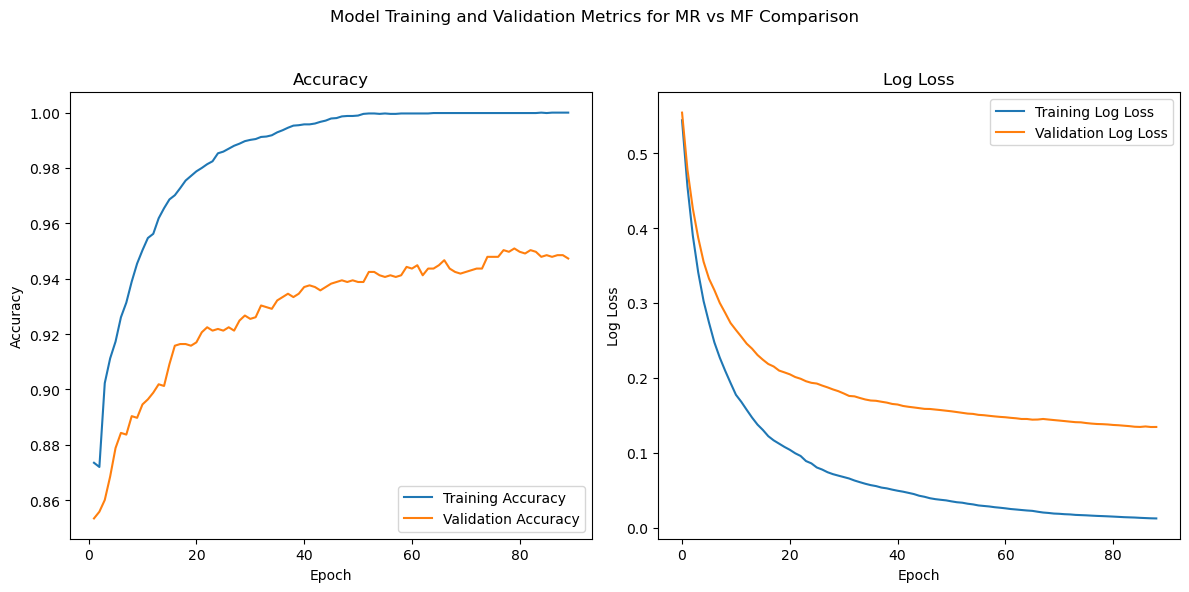

In [130]:
print(f"Accuracy MR vs MF: {accuracy_mr_vs_mf}")
plot_history(history_mr_vs_mf, 'MR vs MF Comparison')

Accuracy All Human vs All Machine: 0.9184354154032747


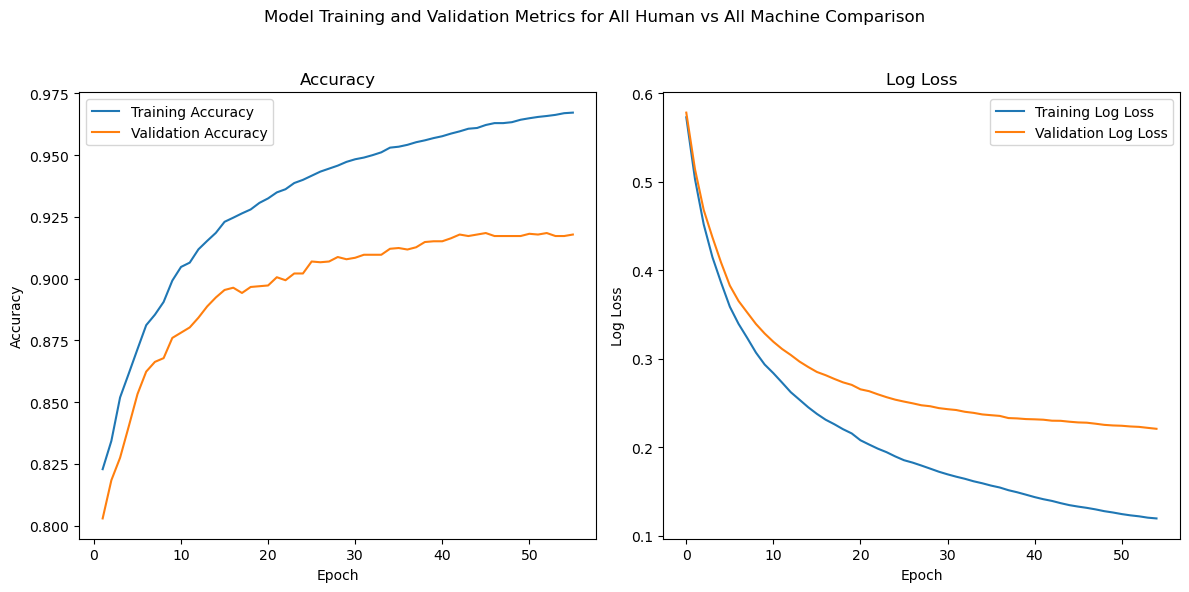

In [131]:
print(f"Accuracy All Human vs All Machine: {accuracy_human_machine}")
plot_history(history_human_machine, 'All Human vs All Machine Comparison')


# Example of one of the test models

In [150]:
from sklearn.metrics import confusion_matrix, accuracy_score

def display_classification_examples(X_test_tfidf, y_test, predictions, vectorizer):
    # Convert TF-IDF back to text
    X_test_texts = [" ".join(words_array) for words_array in vectorizer.inverse_transform(X_test_tfidf)]
    
    # Finding misclassified and correctly classified indices
    misclassified_indices = []
    correctly_classified_indices = []
    for i, (actual, predicted) in enumerate(zip(y_test, predictions)):
        if actual != predicted:
            misclassified_indices.append(i)
        else:
            correctly_classified_indices.append(i)
    
    # Display examples
    print("\nCorrectly Classified Examples:")
    for i in correctly_classified_indices[:3]:  # Display first 3 correctly classified examples
        print(f"Text: {X_test_texts[i]}\nLabel: {y_test[i]}\n")
    
    print("Misclassified Examples:")
    for i in misclassified_indices[:3]:  # Display first 3 misclassified examples
        print(f"Text: {X_test_texts[i]}\nActual Label: {y_test[i]}, Predicted Label: {predictions[i]}\n")


display_classification_examples(X_test_hr_vs_mf_tfidf, y_test_hr_vs_mf, predictions_hr_vs_mf, tfidf_vectorizer_hr_vs_mf)




Correctly Classified Examples:
Misclassified Examples:
Text: 100 12 17 2017 25 30 300 34 50 abc about according account acted activity actual actually adams address addressed affected africa african after aftermath afternoon again agreed air aired airing airs alex alexis all allegation alleged alone already also always am america americans amount an and angry answered any anybody anyone anything approach are arms around as ask asked ass assume at aug awaiting away bachelor bachelorette back bad based be bear became because been before behalf behind being believed below best between bigger biggest bit black blame bond boss both breakfast bring broke bros bump but by call calling came camera cameras can cancer candidly car career carried cast catch certain changed chat chris class clear come comedy coming common compared complaint completely concluded conference confused consensual consent consider contestant contestants continue continues controversy conversation conversations cool cor

# Poltifact(New) dataset Validation (Work in Progress)


In [132]:
# Add a 'label' column to PHR_df
PHR_df['label'] = 0  # Real

# Add a 'label' column to PHF_df
PHF_df['label'] = 1  # Fake

In [133]:
from sklearn.metrics import accuracy_score, classification_report

def evaluate_model(model, X_test, y_test):
    """Evaluates a pre-trained model(XgBoost) on a test dataset.
    Args:
        model: A trained machine learning model(XGboost for this case).
        X_test: Features of the test dataset (must be preprocessed and vectorized).
        y_test: True labels of the test dataset.
    """
    # Make predictions
    y_pred = model.predict(X_test)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)

    # Generate classification report
    report = classification_report(y_test, y_pred)

    return accuracy, report


In [134]:
# Assuming `tfidf_vectorizer_hr_vs_hf` is the vectorizer used to train `model_hr_vs_hf`
X_phr_tfidf = tfidf_vectorizer_hr_vs_hf.transform(PHR_df['text'])
X_phf_tfidf = tfidf_vectorizer_hr_vs_hf.transform(PHF_df['text'])

# Assuming you have the true labels available in your PHR_df and PHF_df
y_phr = PHR_df['label']
y_phf = PHF_df['label']


In [135]:
# Evaluate the model on PHR data
accuracy_phr, report_phr = evaluate_model(model_hr_vs_hf, X_phr_tfidf, y_phr)
print("Accuracy on PHR data:", accuracy_phr)
print("Classification Report for PHR:\n", report_phr)

# Evaluate the model on PHF data
accuracy_phf, report_phf = evaluate_model(model_hr_vs_hf, X_phf_tfidf, y_phf)
print("Accuracy on PHF data:", accuracy_phf)
print("Classification Report for PHF:\n", report_phf)


Accuracy on PHR data: 0.7474226804123711
Classification Report for PHR:
               precision    recall  f1-score   support

           0       1.00      0.75      0.86       194
           1       0.00      0.00      0.00         0

    accuracy                           0.75       194
   macro avg       0.50      0.37      0.43       194
weighted avg       1.00      0.75      0.86       194

Accuracy on PHF data: 0.3917525773195876
Classification Report for PHF:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.39      0.56        97

    accuracy                           0.39        97
   macro avg       0.50      0.20      0.28        97
weighted avg       1.00      0.39      0.56        97



/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.